In [14]:
# Stephen.Griffies@noaa.gov 

In [15]:
import xarray as xr
import matplotlib.pyplot as plt
from xgcm import Grid
import numpy as np
import seaborn as sns
import pandas as pd
import cmocean

from mpl_toolkits.axes_grid1 import make_axes_locatable
import mplsettings     # from https://github.com/jkrasting/mplsettings

import cartopy.crs as ccrs

%matplotlib inline

In [16]:
#dirstix = "/net2/rnd/dev/stixfonts/fonts/static_ttf"
dirstix = "../../common/static_ttf"
import matplotlib.font_manager as font_manager
for font in font_manager.findSystemFonts(dirstix):
    font_manager.fontManager.addfont(font)

# Set font family globally
plt.rcParams['font.family'] = 'STIX Two Text'

In [17]:
# datasets for p25
fname_static = "../../common/CM4X_p25/ocean_annual.static.nc"
static_p25 = xr.open_mfdataset("../../common/CM4X_p25/ocean_annual.static.nc")
#staticp25 = xr.open_mfdataset("/net/smg/OWG/CM4_highres/grids/p25/ocean_annual.static.nc")

area_p25      = static_p25['areacello']*static_p25['wet']
area_p25_xsum = area_p25.sum(dim='xh') 

#ds_p25 = xr.open_mfdataset("/work/Stephen.Griffies/CM4_highres/zos/CM4Xp25_zos_daily_std.nc")
ds_p25 = xr.open_mfdataset("CM4Xp25_zos_daily_std.nc")
zos_std_p25 = ds_p25['zos']

In [18]:
# datasets for p125

#staticp125 = xr.open_mfdataset("/net/smg/OWG/CM4_highres/grids/p125/ocean_annual.static.nc")
static_p125 = xr.open_mfdataset("../../common/CM4X_p125/ocean_annual.static.nc")

#dsp125      = xr.open_mfdataset("/work/Stephen.Griffies/CM4_highres/zos/CM4Xp125_zos_daily_std.nc")
ds_p125      = xr.open_mfdataset("CM4Xp125_zos_daily_std.nc")
zos_std_p125 = ds_p125['zos']

area_p125       = static_p125['areacello']*static_p125['wet']
area_p125_xsum  = area_p125.sum(dim='xh') 


In [19]:
# datasets for Glorys
#fnameglorys = "/work/jet/data/interim/GLORYS12V1_global_zos_std_daily_1993to2014.nc"
#fnameglorys = "/work/jet/sldata/glrys_global_zos_std_1995to2014_daily.nc"
fnameglorys = "glrys_global_zos_std_1995to2014_daily.nc"
dsglorys    = xr.open_mfdataset(fnameglorys)
zos_daily_std_glorys = dsglorys['zos_std']

In [20]:
zos_std_p25_area = zos_std_p25*area_p25
zos_std_p25_xave = zos_std_p25_area.sum(dim='xh')/area_p25_xsum

zos_std_p125_area = zos_std_p125*area_p125
zos_std_p125_xave = zos_std_p125_area.sum(dim='xh')/area_p125_xsum

zos_daily_std_glorys_xave = zos_daily_std_glorys.mean(dim='xh') 

zos_std_p125_xave.load()
zos_std_p25_xave.load()
zos_daily_std_glorys_xave.load()

<xarray.DataArray 'zos_std' (yh: 2041)> Size: 16kB
array([       nan,        nan,        nan, ..., 0.0557003 , 0.05545124,
              nan])
Coordinates:
  * yh       (yh) float32 8kB -80.0 -79.92 -79.83 -79.75 ... 89.83 89.92 90.0

In [21]:
static_p25['yh']

<xarray.DataArray 'yh' (yh: 1080)> Size: 9kB
array([-80.389238, -80.308075, -80.226911, ...,  89.729781,  89.837868,
        89.945956])
Coordinates:
  * yh       (yh) float64 9kB -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
Attributes:
    long_name:  h point nominal latitude
    units:      degrees_north
    axis:       Y

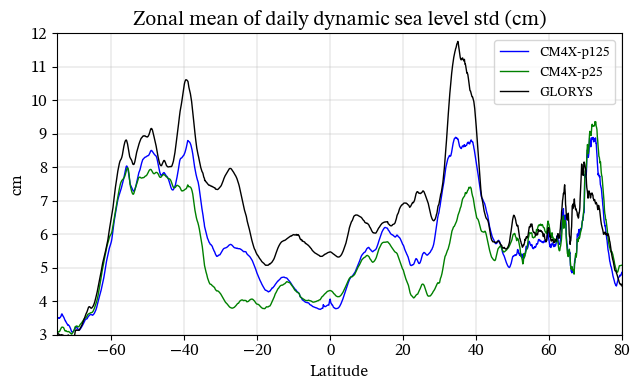

In [22]:
#map zonal mean
vmin=0
vmax=0.5
levels = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6.5,4.0))

plt.plot(static_p125['yh'],100*zos_std_p125_xave,label='CM4X-p125',color='blue',linewidth=1)
plt.plot(static_p25['yh'],100*zos_std_p25_xave,label='CM4X-p25',color='green',linewidth=1)
plt.plot(dsglorys['yh'],100*zos_daily_std_glorys_xave,label='GLORYS', color='k',linewidth=1)
plt.tick_params(labelsize=12) 
plt.ylabel('cm', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.title('Zonal mean of daily dynamic sea level std (cm)', fontsize=15)
plt.grid(linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim([-75,80])
plt.ylim(3,12)

plt.tight_layout()
plt.show()
fig.savefig('Fig03_zos_std_xave.jpg', bbox_inches='tight', dpi=400, format='jpeg')

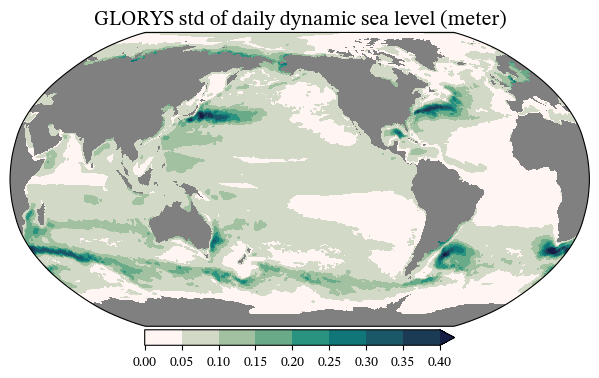

In [23]:
#map glorys
field = zos_daily_std_glorys
vmin=0
vmax=0.5
#levels = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
levels = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]


fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6.5,4.0),
             subplot_kw={'projection': ccrs.Robinson(central_longitude=-150)})

p=xr.plot.contourf(field, ax=axis, x="xh", y="yh",
#                     vmin=vmin, vmax=vmax,
                    levels = levels, 
                     transform=ccrs.PlateCarree(), 
                     cmap=cmocean.cm.tempo,
                     add_colorbar=False,
            )

#axs.gridlines()
plt.gca().set_facecolor('gray')
plt.tick_params(labelsize=12) 
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('GLORYS std of daily dynamic sea level (meter)', fontsize=15)
cbar = plt.colorbar(p,pad=0.01,spacing='uniform', shrink=0.5,orientation='horizontal')

plt.tight_layout()
plt.show()
fig.savefig('Fig03_GLORYS_daily_zos_std.jpg', bbox_inches='tight', dpi=400, format='jpeg')

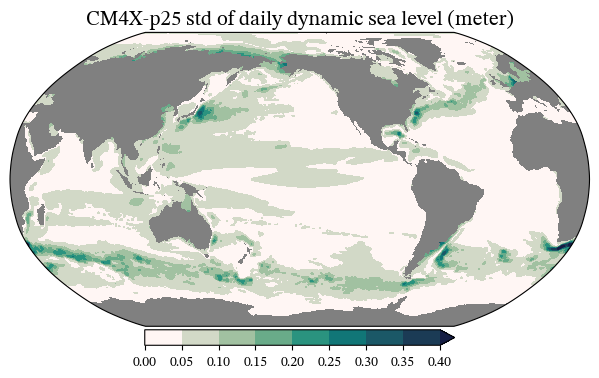

In [24]:
#map p25
field = zos_std_p25
vmin=0
vmax=0.5
#levels = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
levels = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6.5,4.0),
             subplot_kw={'projection': ccrs.Robinson(central_longitude=-150)})

p=xr.plot.contourf(field, ax=axis, x="geolon", y="geolat",
#                     vmin=vmin, vmax=vmax,
                     levels=levels,
                     transform=ccrs.PlateCarree(), 
                     cmap=cmocean.cm.tempo,
                     add_colorbar=False,
            )

#axs.gridlines()
plt.gca().set_facecolor('gray')
plt.tick_params(labelsize=12) 
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('CM4X-p25 std of daily dynamic sea level (meter)', fontsize=15)
cbar = plt.colorbar(p,pad=0.01,spacing='uniform', shrink=0.5,orientation='horizontal')

plt.tight_layout()
plt.show()
fig.savefig('Fig03_CM4Xp25_daily_zos_std.jpg', bbox_inches='tight', dpi=400, format='jpeg')

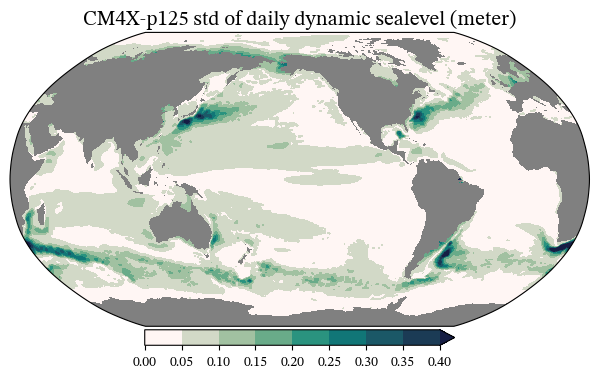

In [25]:
#map p125
field = zos_std_p125
vmin=0
vmax=0.5
#levels = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
levels = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6.5,4.0),
             subplot_kw={'projection': ccrs.Robinson(central_longitude=-150)})

p=xr.plot.contourf(field, ax=axis, x="geolon", y="geolat",
#                     vmin=vmin, vmax=vmax,
                     levels=levels, 
                     transform=ccrs.PlateCarree(), 
                     cmap=cmocean.cm.tempo,
                     add_colorbar=False,
            )

#axs.gridlines()
plt.gca().set_facecolor('gray')
plt.tick_params(labelsize=12) 
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('CM4X-p125 std of daily dynamic sealevel (meter)', fontsize=15)
cbar = plt.colorbar(p,pad=0.01,spacing='uniform', shrink=0.5,orientation='horizontal')

plt.tight_layout()
plt.show()
fig.savefig('Fig03_CM4Xp125_daily_zos_std.jpg', bbox_inches='tight', dpi=400, format='jpeg')